# Processamento e análise de dados com Python

## Contexto e casos de uso
- Porque `pandas` em vez de Excel e planilhas em geral?
  - separação entre código e dados
  - transparência procedimental -> notebooks
  - reprodutibilidade -> `docker`, `virtualenv` etc.
  - automação -> `cron`, `Airflow`, `Prefect` etc.
  - custo -> open-source
  - big data
    - `Dask`
    - `vaex`
    - `Spark`*
  - type safety
  - ecossistema pythônico
    - automação de workflows: `Airflow`, `Prefect`
    - ciência de dados: `scikit-learn`, `Tensorflow`, `PyTorch`, `numpy`, `statsmodels`, `gensim`, `nltk`, `spaCy` etc.
    - web e APIs: `FastAPI`, `django`, `flask` etc.
    - libs de big data citadas acima
    - muito mais
- Casos de uso
  - análise exploratória de dados
  - processamento automatizado de dados
    - limpeza de dados
    - transformações de dados: operações de agregação, pivot tables etc.
  - machine learning
    - feature engineering
    - treinamento de modelos de machine learning
  - muito mais

Dica de palestra do cientista de dados Vincent D. Warmerdam sobre o assunto na PyData Eindhoven 2021: [https://www.youtube.com/watch?v=yXGCKqo5cEY](https://www.youtube.com/watch?v=yXGCKqo5cEY)

## Conceitos: vetorização e DataFrames

### Vetorização
![Vetorização](vetorizacao.png "Vetorização")

Fonte: [https://datascience.blog.wzb.eu/2018/02/02/vectorization-and-parallelization-in-python-with-numpy-and-pandas/](https://datascience.blog.wzb.eu/2018/02/02/vectorization-and-parallelization-in-python-with-numpy-and-pandas/)

In [2]:
import random

a = [random.randint(1, 100) for _ in range(1000000)]
b = [random.randint(1, 100) for _ in range(1000000)]
%timeit res = [x * y for x, y in zip(a, b)]

67.2 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
import numpy as np

a = np.random.randint(1, 100, 1000000)
b = np.random.randint(1, 100, 1000000)
%timeit a * b

1.53 ms ± 45.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
import pandas as pd

s1 = pd.Series(a)
s2 = pd.Series(b)
%timeit s1 * s2

1.61 ms ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### DataFrame
De acordo com a [documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) do `pandas`:
> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

Características gerais:
- dados são carregados na memória
- vetorização
- tipagem de colunas
- índices
- flexibilidade de input: `json`, `csv`, `xlsx`, `sql` etc.

## Colocando a mão na massa

In [5]:
!pip install pandas

You should consider upgrading via the '/home/vmussa/dev/alexandria/notebooks/.venv/bin/python -m pip install --upgrade pip' command.


In [6]:
import pandas as pd

### Criando um `DataFrame`

In [7]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided.
col

In [8]:
pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

,a,b
0,1,4
1,2,5
2,3,6


In [9]:
pd.DataFrame(data=[[1, 4], [2, 5], [3, 6]], columns=['a', 'b'])

,a,b
0,1,4
1,2,5
2,3,6


In [10]:
pd.read_csv('scraped_data.csv')

,authors,quotes,tags,about_relative_url,goodreads_url
0,Albert Einstein,“The world as we have created it is a process ...,"['change', 'deep-thoughts', 'thinking', 'world']",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...","['abilities', 'choices']",/author/J-K-Rowling,http://goodreads.com/author/show/1077326.J_K_R...
2,Albert Einstein,“There are only two ways to live your life. On...,"['inspirational', 'life', 'live', 'miracle', '...",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
3,Jane Austen,"“The person, be it gentleman or lady, who has ...","['aliteracy', 'books', 'classic', 'humor']",/author/Jane-Austen,http://goodreads.com/author/show/1265.Jane_Austen
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...","['be-yourself', 'inspirational']",/author/Marilyn-Monroe,http://goodreads.com/author/show/82952.Marilyn...
...,...,...,...,...,...
95,Harper Lee,“You never really understand a person until yo...,['better-life-empathy'],/author/Harper-Lee,http://goodreads.com/author/show/1825.Harper_Lee
96,Madeleine L'Engle,“You have to write the book that wants to be w...,"['books', 'children', 'difficult', 'grown-ups'...",/author/Madeleine-LEngle,http://goodreads.com/author/show/106.Madeleine...
97,Mark Twain,“Never tell the truth to people who are not wo...,['truth'],/author/Mark-Twain,http://goodreads.com/author/show/1244.Mark_Twain
98,Dr. Seuss,"“A person's a person, no matter how small.”",['inspirational'],/author/Dr-Seuss,http://goodreads.com/author/show/61105.Dr_Seuss


### Criando uma `Series`

In [11]:
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool' = False,
    fastpath: 'bool' = False,
)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same 

In [12]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [13]:
pd.Series([1, 2, 3], index=['a', 'b', 'c'])

a    1
b    2
c    3
dtype: int64

In [14]:
pd.Series([1, 2, 3], index=['a', 'b', 'c'], name='nome_da_serie')

a    1
b    2
c    3
Name: nome_da_serie, dtype: int64

In [15]:
pd.Series([1, 2, 3], index=['a', 'b', 'c'], name='nome_da_serie').to_frame()

,nome_da_serie
a,1
b,2
c,3


### Algumas operações básicas com DataFrames

In [49]:
df = pd.read_csv('scraped_data.csv')
df.head()

,authors,quotes,tags,about_relative_url,goodreads_url
0,Albert Einstein,“The world as we have created it is a process ...,"['change', 'deep-thoughts', 'thinking', 'world']",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...","['abilities', 'choices']",/author/J-K-Rowling,http://goodreads.com/author/show/1077326.J_K_R...
2,Albert Einstein,“There are only two ways to live your life. On...,"['inspirational', 'life', 'live', 'miracle', '...",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
3,Jane Austen,"“The person, be it gentleman or lady, who has ...","['aliteracy', 'books', 'classic', 'humor']",/author/Jane-Austen,http://goodreads.com/author/show/1265.Jane_Austen
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...","['be-yourself', 'inspirational']",/author/Marilyn-Monroe,http://goodreads.com/author/show/82952.Marilyn...


#### Contando os autores

In [50]:
df['authors']

0        Albert Einstein
1           J.K. Rowling
2        Albert Einstein
3            Jane Austen
4         Marilyn Monroe
             ...        
95            Harper Lee
96     Madeleine L'Engle
97            Mark Twain
98             Dr. Seuss
99    George R.R. Martin
Name: authors, Length: 100, dtype: object

In [51]:
df['authors'].value_counts()

Albert Einstein           10
J.K. Rowling               9
Marilyn Monroe             7
Dr. Seuss                  6
Mark Twain                 6
C.S. Lewis                 5
Jane Austen                5
Bob Marley                 3
Eleanor Roosevelt          2
Charles Bukowski           2
Suzanne Collins            2
George R.R. Martin         2
Ralph Waldo Emerson        2
Mother Teresa              2
Ernest Hemingway           2
J.D. Salinger              1
George Bernard Shaw        1
J.R.R. Tolkien             1
Alfred Tennyson            1
Terry Pratchett            1
John Lennon                1
George Carlin              1
W.C. Fields                1
Ayn Rand                   1
Jimi Hendrix               1
J.M. Barrie                1
E.E. Cummings              1
Khaled Hosseini            1
Harper Lee                 1
Helen Keller               1
Haruki Murakami            1
Stephenie Meyer            1
Garrison Keillor           1
Thomas A. Edison           1
Douglas Adams 

#### Contando as tags

In [52]:
df['tags'] = df['tags'].apply(lambda x: eval(x))
df

,authors,quotes,tags,about_relative_url,goodreads_url
0,Albert Einstein,“The world as we have created it is a process ...,"[change, deep-thoughts, thinking, world]",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...","[abilities, choices]",/author/J-K-Rowling,http://goodreads.com/author/show/1077326.J_K_R...
2,Albert Einstein,“There are only two ways to live your life. On...,"[inspirational, life, live, miracle, miracles]",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
3,Jane Austen,"“The person, be it gentleman or lady, who has ...","[aliteracy, books, classic, humor]",/author/Jane-Austen,http://goodreads.com/author/show/1265.Jane_Austen
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...","[be-yourself, inspirational]",/author/Marilyn-Monroe,http://goodreads.com/author/show/82952.Marilyn...
...,...,...,...,...,...
95,Harper Lee,“You never really understand a person until yo...,[better-life-empathy],/author/Harper-Lee,http://goodreads.com/author/show/1825.Harper_Lee
96,Madeleine L'Engle,“You have to write the book that wants to be w...,"[books, children, difficult, grown-ups, write,...",/author/Madeleine-LEngle,http://goodreads.com/author/show/106.Madeleine...
97,Mark Twain,“Never tell the truth to people who are not wo...,[truth],/author/Mark-Twain,http://goodreads.com/author/show/1244.Mark_Twain
98,Dr. Seuss,"“A person's a person, no matter how small.”",[inspirational],/author/Dr-Seuss,http://goodreads.com/author/show/61105.Dr_Seuss


In [53]:
df = (df.explode('tags')
        .rename(columns={'tags_parsed': 'tags'}))

df

,authors,quotes,tags,about_relative_url,goodreads_url
0,Albert Einstein,“The world as we have created it is a process ...,change,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,Albert Einstein,“The world as we have created it is a process ...,deep-thoughts,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,Albert Einstein,“The world as we have created it is a process ...,thinking,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,Albert Einstein,“The world as we have created it is a process ...,world,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",abilities,/author/J-K-Rowling,http://goodreads.com/author/show/1077326.J_K_R...
...,...,...,...,...,...
96,Madeleine L'Engle,“You have to write the book that wants to be w...,writing,/author/Madeleine-LEngle,http://goodreads.com/author/show/106.Madeleine...
97,Mark Twain,“Never tell the truth to people who are not wo...,truth,/author/Mark-Twain,http://goodreads.com/author/show/1244.Mark_Twain
98,Dr. Seuss,"“A person's a person, no matter how small.”",inspirational,/author/Dr-Seuss,http://goodreads.com/author/show/61105.Dr_Seuss
99,George R.R. Martin,“... a mind needs books as a sword needs a whe...,books,/author/George-R-R-Martin,http://goodreads.com/author/show/346732.George...


In [54]:
df['tags'].value_counts()

love                         14
inspirational                13
life                         13
humor                        12
books                        11
                             ..
misattributed-john-lennon     1
fate                          1
contentment                   1
unhappy-marriage              1
mind                          1
Name: tags, Length: 137, dtype: int64

#### Plotando as 20 tags mais usadas 

In [55]:
!pip install matplotlib

You should consider upgrading via the '/home/vmussa/dev/alexandria/notebooks/.venv/bin/python -m pip install --upgrade pip' command.


<AxesSubplot:title={'center':'Contagem de Tags'}>

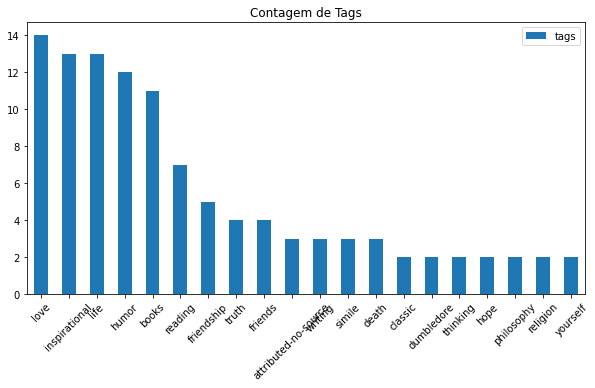

In [78]:
df['tags'].value_counts().head(20).plot(
    kind='bar',
    title='Contagem de Tags',
    figsize=(10, 5),
    legend=True,
    fontsize=10,
    rot=45
)

<AxesSubplot:>

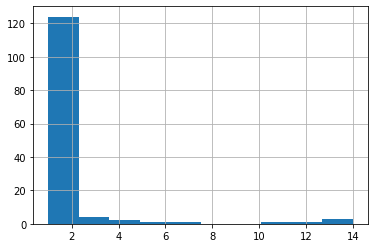

In [57]:
df['tags'].value_counts().hist()

### Plotando a contagem de autores

In [58]:
df['authors'].value_counts()

Albert Einstein           25
Jane Austen               15
Mark Twain                14
Marilyn Monroe            14
C.S. Lewis                13
J.K. Rowling              12
Dr. Seuss                 11
John Lennon                8
Elie Wiesel                8
Madeleine L'Engle          7
George R.R. Martin         6
George Carlin              6
Friedrich Nietzsche        6
J.R.R. Tolkien             6
J.D. Salinger              5
Allen Saunders             5
Ernest Hemingway           5
Eleanor Roosevelt          4
Thomas A. Edison           4
George Bernard Shaw        3
Steve Martin               3
Bob Marley                 3
Mother Teresa              3
Terry Pratchett            3
Ralph Waldo Emerson        3
Stephenie Meyer            3
Charles M. Schulz          3
Charles Bukowski           2
W.C. Fields                2
Douglas Adams              2
Alfred Tennyson            2
André Gide                 2
Suzanne Collins            2
Pablo Neruda               2
Jimi Hendrix  

### Agregação de dados com `groupby`

In [86]:
authors = (df.groupby(
                ['authors',
                'quotes',
                'about_relative_url',
                'goodreads_url'])
            .agg({'tags': list})
            .reset_index())

authors.head()

,authors,quotes,about_relative_url,goodreads_url,tags
0,Albert Einstein,“Any fool can know. The point is to understand.”,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...,"[knowledge, learning, understanding, wisdom]"
1,Albert Einstein,“Anyone who has never made a mistake has never...,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...,[mistakes]
2,Albert Einstein,"“If I were not a physicist, I would probably b...",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...,[music]
3,Albert Einstein,"“If you can't explain it to a six year old, yo...",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...,"[simplicity, understand]"
4,Albert Einstein,"“If you want your children to be intelligent, ...",/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...,"[children, fairy-tales]"


<AxesSubplot:title={'center':'Contagem de Autores'}>

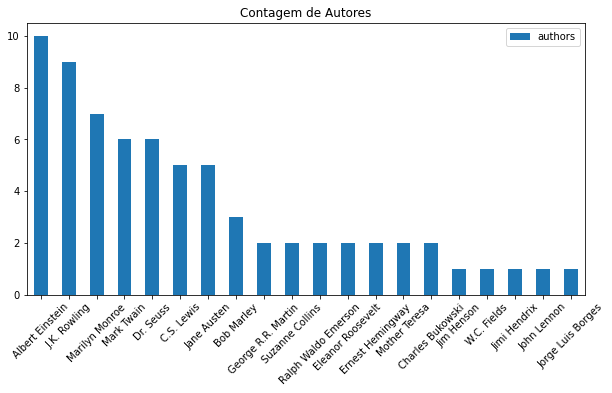

In [89]:
(authors['authors']
    .value_counts()
    .head(20)
    .plot(
        kind='bar',
        title='Contagem de Autores',
        figsize=(10, 5),
        legend=True,
        fontsize=10,
        rot=45
    ))

### Voltando alguns passos: indexação, seleção e acesso a `DataFrames` e `Series`

### Funções de sumarização e mapas

Vamos usar um dataset real. Para isso, importaremos dados do data lake público da Base dos Dados. Usaremos os dados do PIB brasileiro provenientes do IBGE.

In [102]:
!pip install basedosdados

  Using cached basedosdados-1.5.7-py3-none-any.whl (34 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached google_cloud_bigquery-1.28.0-py2.py3-none-any.whl (187 kB)
  Using cached tqdm-4.50.2-py2.py3-none-any.whl (70 kB)
  Using cached google_cloud_storage-1.31.2-py2.py3-none-any.whl (88 kB)
  Using cached ruamel.yaml-0.17.4-py3-none-any.whl (101 kB)
  Using cached pandas_gbq-0.13.2-py3-none-any.whl (24 kB)
  Using cached pandas-1.2.4-cp38-cp38-manylinux1_x86_64.whl (9.7 MB)
  Using cached tomlkit-0.7.0-py2.py3-none-any.whl (32 kB)
  Using cached pyaml-20.4.0-py2.py3-none-any.whl (17 kB)
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
  Using cached google_cloud_bigquery_storage-1.1.0-py2.py3-none-any.whl (135 kB)
  Using cached google_cloud_core-1.7.2-py2.py3-none-any.whl (28 kB)
  Using cached google_api_core-1.31.3-py2.py3-none-any.whl (93 kB)
  Using cached google_resumable_media-1.3.3-py2.py3-none-any.whl (75 kB)
  Using cached google_auth-1.35.0

In [105]:
import basedosdados as bd

df = bd.read_table(
    'br_ibge_pib',
    'municipio',
    billing_project_id='projetobase-309422')

Downloading: 100%|██████████| 94616/94616 [00:22<00:00, 4171.22rows/s]


In [106]:
df.head()

,ano,id_municipio,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,1100015,111290995,7549266,103741729,27013223,9376871,24651113,42700523
1,2002,1100023,449592816,42665972,406926845,28590178,99922936,161851549,116562182
2,2002,1100031,31767520,1867935,29899585,10883801,1961907,5128876,11925001
3,2002,1100049,474443097,49622951,424820146,32810376,98292764,175748703,117968303
4,2002,1100056,79173614,8200971,70972643,11283793,6651475,25306009,27731366


In [107]:
df.describe()

,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
count,94616.000000,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04,9.461600e+04
mean,2010.003002,7.287343e+08,1.052315e+08,6.235028e+08,3.313567e+07,1.531836e+08,3.329723e+08,1.042113e+08
std,4.898931,8.059832e+09,1.489081e+09,6.596790e+09,6.356696e+07,1.094854e+09,4.885391e+09,1.058767e+09
min,2002.000000,-1.904643e+07,-1.508840e+07,-5.105931e+08,-2.298910e+06,-2.897193e+09,3.722780e+05,1.446664e+06
25%,2006.000000,3.905784e+07,1.478442e+06,3.729948e+07,6.121093e+06,1.904200e+06,8.765398e+06,1.286555e+07
50%,2010.000000,8.971593e+07,4.477020e+06,8.467848e+07,1.519649e+07,6.322138e+06,2.362657e+07,2.568912e+07
75%,2014.000000,2.555032e+08,1.811785e+07,2.356625e+08,3.532677e+07,3.520165e+07,8.064128e+07,5.908990e+07
max,2018.000000,7.146834e+11,1.271543e+11,5.875291e+11,2.482540e+09,6.689305e+10,4.854288e+11,1.017928e+11


In [108]:
df.columns

Index(['ano', 'id_municipio', 'pib', 'impostos_liquidos', 'va',
       'va_agropecuaria', 'va_industria', 'va_servicos', 'va_adespss'],
      dtype='object')

In [109]:
df.mean()

ano                  2.010003e+03
id_municipio                  inf
pib                  7.287343e+08
impostos_liquidos    1.052315e+08
va                   6.235028e+08
va_agropecuaria      3.313567e+07
va_industria         1.531836e+08
va_servicos          3.329723e+08
va_adespss           1.042113e+08
dtype: float64

In [111]:
df['ano'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018])

In [112]:
df['ano'].max()

2018

In [115]:
df['pib'].min()

-19046434

In [120]:
df['pib'].min()

-19046434

### Agrupamentos e ordenações

In [126]:
df.groupby('ano').pib.sum().apply(lambda x: str(x/1_000_000_000_000) + ' trilhões de reais')

ano
2002    1.488787276039 trilhões de reais
2003    1.717950386056 trilhões de reais
2004    1.957751224028 trilhões de reais
2005    2.170584502984 trilhões de reais
2006    2.409449916019 trilhões de reais
2007     2.72026295093 trilhões de reais
2008    3.109803096975 trilhões de reais
2009    3.333039338988 trilhões de reais
2010    3.885846999973 trilhões de reais
2011    4.376381999975 trilhões de reais
2012    4.814760000022 trilhões de reais
2013    5.331618956621 trilhões de reais
2014    5.778952779987 trilhões de reais
2015    5.995786999978 trilhões de reais
2016    6.269327999976 trilhões de reais
2017    6.585479000016 trilhões de reais
2018    7.004140999992 trilhões de reais
Name: pib, dtype: object

In [131]:
df.groupby(['ano', 'id_municipio']).pib.sum()

ano   id_municipio
2002  1100015            111290995
      1100023            449592816
      1100031             31767520
      1100049            474443097
      1100056             79173614
                          ...     
2018  5222005            440221991
      5222054            322359328
      5222203            103408136
      5222302            163782378
      5300108         254817204692
Name: pib, Length: 94616, dtype: int64

### Tipos de dados e valores faltantes

### Renomear e combinar

## Big Data: transportando seu código para `Dask`

In [91]:
!pip install dask

You should consider upgrading via the '/home/vmussa/dev/alexandria/notebooks/.venv/bin/python -m pip install --upgrade pip' command.


In [93]:
import dask.dataframe as dd

df = dd.from_pandas(df, npartitions=4)
df.head()

,authors,quotes,tags,about_relative_url,goodreads_url
0,Albert Einstein,“The world as we have created it is a process ...,change,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,Albert Einstein,“The world as we have created it is a process ...,deep-thoughts,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,Albert Einstein,“The world as we have created it is a process ...,thinking,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,Albert Einstein,“The world as we have created it is a process ...,world,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",abilities,/author/J-K-Rowling,http://goodreads.com/author/show/1077326.J_K_R...


In [99]:
def lower_case(row):
    row['authors'] = row['authors'].lower()
    return row

df.apply(lower_case, axis=1)

/home/vmussa/dev/alexandria/notebooks/.venv/lib/python3.8/site-packages/dask/dataframe/core.py:4959: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta={'authors': 'object', 'quotes': 'object', 'tags': 'object', 'about_relative_url': 'object', 'goodreads_url': 'object'})

  warnings.warn(meta_warning(meta))


,authors,quotes,tags,about_relative_url,goodreads_url
npartitions=4,,,,,
0,object,object,object,object,object
19,...,...,...,...,...
46,...,...,...,...,...
76,...,...,...,...,...
99,...,...,...,...,...


In [101]:
df.apply(lower_case, axis=1).compute()

/home/vmussa/dev/alexandria/notebooks/.venv/lib/python3.8/site-packages/dask/dataframe/core.py:4959: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta={'authors': 'object', 'quotes': 'object', 'tags': 'object', 'about_relative_url': 'object', 'goodreads_url': 'object'})

  warnings.warn(meta_warning(meta))


,authors,quotes,tags,about_relative_url,goodreads_url
0,albert einstein,“The world as we have created it is a process ...,change,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,albert einstein,“The world as we have created it is a process ...,deep-thoughts,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,albert einstein,“The world as we have created it is a process ...,thinking,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
0,albert einstein,“The world as we have created it is a process ...,world,/author/Albert-Einstein,http://goodreads.com/author/show/9810.Albert_E...
1,j.k. rowling,"“It is our choices, Harry, that show what we t...",abilities,/author/J-K-Rowling,http://goodreads.com/author/show/1077326.J_K_R...
...,...,...,...,...,...
96,madeleine l'engle,“You have to write the book that wants to be w...,writing,/author/Madeleine-LEngle,http://goodreads.com/author/show/106.Madeleine...
97,mark twain,“Never tell the truth to people who are not wo...,truth,/author/Mark-Twain,http://goodreads.com/author/show/1244.Mark_Twain
98,dr. seuss,"“A person's a person, no matter how small.”",inspirational,/author/Dr-Seuss,http://goodreads.com/author/show/61105.Dr_Seuss
99,george r.r. martin,“... a mind needs books as a sword needs a whe...,books,/author/George-R-R-Martin,http://goodreads.com/author/show/346732.George...
